In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# from sklearn import preprocessing, neighbors 
# from sklearn.model_selection import cross_val_score 
# from sklearn.model_selection import train_test_split 


sns.set_style('darkgrid')
plt.rcParams['figure.dpi'] = 120

In [7]:
df = pd.read_csv('./Multas de tránsito/MS_stops.csv', sep=';', encoding='iso8859_2')
df.head()

,id,state,stop_date,county_name,county_fips,police_department,driver_gender,driver_birthdate,driver_race,violation_raw,officer_id,driver_age,violation,wk_day,y_day
0,MS-2013-00001,EC,1/1/2013,QUITO,28067,Ecuador,male,14/6/1950,Black,Seat belt not used properly as required,J042,63.0,Seat belt,Tue,1.0
1,MS-2013-00002,EC,1/1/2013,ALANGASI,28075,Ecuador,male,6/4/1967,Black,Careless driving,B026,46.0,Careless driving,Tue,1.0
2,MS-2013-00003,EC,1/1/2013,AMAGUAŃA,28113,Ecuador,male,15/4/1974,Black,Speeding - Regulated or posted speed limit and...,M009,39.0,Speeding,Tue,1.0
3,MS-2013-00004,EC,1/1/2013,ATAHUALPA (HABASPAMBA),28045,Ecuador,male,23/3/1981,White,Speeding - Regulated or posted speed limit and...,K035,32.0,Speeding,Tue,1.0
4,MS-2013-00005,EC,1/1/2013,CALACALI,28051,Ecuador,male,3/8/1992,White,Speeding - Regulated or posted speed limit and...,D028,20.0,Speeding,Tue,1.0


In [13]:
df.groupby('county_name')['id'].count().nlargest()

county_name
SAN ANTONIO              8466
ALANGASI                 6773
CALDERON (CARAPUNGO)     5740
TABABELA                 5219
SANGOLQUI                5140
Name: id, dtype: int64

In [15]:
df.groupby('county_name')['id'].count().mean()


2144.621951219512

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175859 entries, 0 to 175858
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175859 non-null  object 
 1   state              175859 non-null  object 
 2   stop_date          175859 non-null  object 
 3   county_name        175859 non-null  object 
 4   county_fips        175859 non-null  int64  
 5   police_department  175859 non-null  object 
 6   driver_gender      175834 non-null  object 
 7   driver_birthdate   175762 non-null  object 
 8   driver_race        175834 non-null  object 
 9   violation_raw      175859 non-null  object 
 10  officer_id         175852 non-null  object 
 11  driver_age         175761 non-null  float64
 12  violation          175858 non-null  object 
 13  wk_day             175858 non-null  object 
 14  y_day              175858 non-null  float64
dtypes: float64(2), int64(1), object(12)
memory usage: 2

In [20]:
df.wk_day

0         Tue
1         Tue
2         Tue
3         Tue
4         Tue
         ... 
175854    Thu
175855    Thu
175856    Thu
175857    Thu
175858    NaN
Name: wk_day, Length: 175859, dtype: object

In [25]:
df.stop_date.astype('datetime64').dt.week

C:\Users\alejo\AppData\Local\Temp/ipykernel_9340/571553970.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.stop_date.astype('datetime64').dt.week


0          1
1          1
2          1
3          1
4          1
          ..
175854    44
175855    44
175856    44
175857    44
175858    44
Name: stop_date, Length: 175859, dtype: int64

In [27]:
df['week'] = df.stop_date.astype('datetime64').dt.week

C:\Users\alejo\AppData\Local\Temp/ipykernel_9340/875375406.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.stop_date.astype('datetime64').dt.week


In [29]:
dft = pd.crosstab(df.county_name, df.week)

In [42]:
{i:dft[i].nlargest(1).index[0] for i in dft.columns}

{1: 'SAN ANTONIO',
 2: 'ALANGASI',
 3: 'SAN ANTONIO',
 4: 'TABABELA',
 5: 'SAN ANTONIO',
 6: 'ALANGASI',
 7: 'SAN ANTONIO',
 8: 'SAN ANTONIO',
 9: 'SAN ANTONIO',
 10: 'ALANGASI',
 11: 'SAN ANTONIO',
 12: 'SAN ANTONIO',
 13: 'SAN ANTONIO',
 14: 'SAN ANTONIO',
 15: 'SAN ANTONIO',
 16: 'SAN ANTONIO',
 17: 'ALANGASI',
 18: 'SAN ANTONIO',
 19: 'SAN ANTONIO',
 20: 'ALANGASI',
 21: 'SAN ANTONIO',
 22: 'SAN ANTONIO',
 23: 'SAN ANTONIO',
 24: 'SAN ANTONIO',
 25: 'SAN ANTONIO',
 26: 'SAN ANTONIO',
 27: 'SAN ANTONIO',
 28: 'SAN ANTONIO',
 29: 'SAN ANTONIO',
 30: 'SAN ANTONIO',
 31: 'ALANGASI',
 32: 'ALANGASI',
 33: 'CUMBAYA',
 34: 'ALANGASI',
 35: 'ALANGASI',
 36: 'SAN ANTONIO',
 37: 'ALANGASI',
 38: 'SAN ANTONIO',
 39: 'SANGOLQUI',
 40: 'SAN ANTONIO',
 41: 'SAN ANTONIO',
 42: 'ALANGASI',
 43: 'ALANGASI',
 44: 'SAN ANTONIO',
 45: 'SAN ANTONIO',
 46: 'SANGOLQUI',
 47: 'CHECA (CHILPA) ',
 48: 'SAN ANTONIO',
 49: 'SAN ANTONIO',
 50: 'ALANGASI',
 51: 'SAN ANTONIO',
 52: 'SANGOLQUI'}

In [47]:
df.columns

Index(['id', 'state', 'stop_date', 'county_name', 'county_fips',
       'police_department', 'driver_gender', 'driver_birthdate', 'driver_race',
       'violation_raw', 'officer_id', 'driver_age', 'violation', 'wk_day',
       'y_day', 'week'],
      dtype='object')

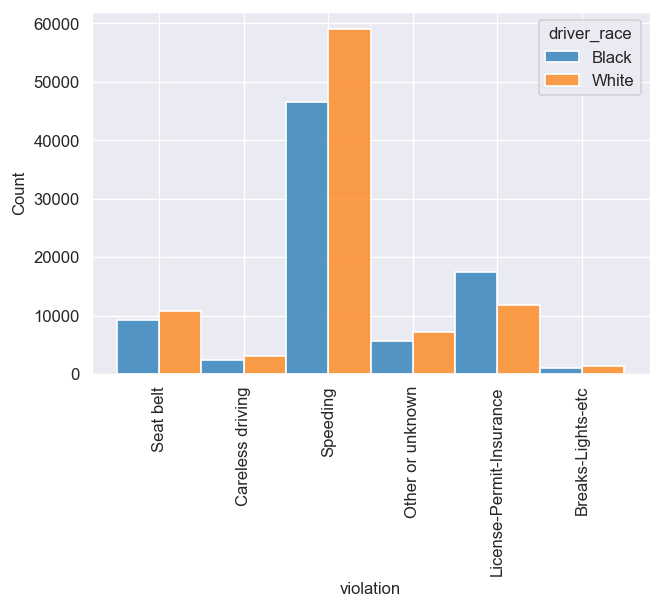

In [53]:
sns.histplot(data=df, x='violation', hue='driver_race', multiple="dodge")
plt.xticks(rotation=90)
plt.show()